# IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# READ THE DATASET

In [2]:
data = pd.read_csv("student-mat.csv")
#pd.pandas.set_option("display.max_columns",None)
#pd.pandas.set_option("display.max_rows",None)

In [3]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


# DATA DESCRIPTION

In [4]:
#school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
#sex - student's sex (binary: 'F' - female or 'M' - male)
#age - student's age (numeric: from 15 to 22)
#address - student's home address type (binary: 'U' - urban or 'R' - rural)
#famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
#Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
#Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
#Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
#Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
#Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
#reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
#guardian - student's guardian (nominal: 'mother', 'father' or 'other')
#traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
#studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
#failures - number of past class failures (numeric: n if 1<=n<3, else 4)
#schoolsup - extra educational support (binary: yes or no)
#famsup - family educational support (binary: yes or no)
#paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
#activities - extra-curricular activities (binary: yes or no)
#nursery - attended nursery school (binary: yes or no)
#higher - wants to take higher education (binary: yes or no)
#internet - Internet access at home (binary: yes or no)
#romantic - with a romantic relationship (binary: yes or no)
#famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
#freetime - free time after school (numeric: from 1 - very low to 5 - very high)
#goout - going out with friends (numeric: from 1 - very low to 5 - very high)
#Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
#Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
#health - current health status (numeric: from 1 - very bad to 5 - very good)
#absences - number of school absences (numeric: from 0 to 93)
#These grades are related with the course subject, Math or Portuguese:

#G1 - first period grade (numeric: from 0 to 20)
#G2 - second period grade (numeric: from 0 to 20)
#G3 - final grade (numeric: from 0 to 20, output target)

In [5]:
data.shape

(395, 33)

In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
features = ['age', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

In [8]:
data_1 = data[features]

# EXPLORATORY DATA  ANALYSIS

In [9]:
data[features].shape

(395, 14)

In [10]:
std_dev = np.std (data[features])
mean = np.mean(data[features])
variance = np.var(data[features])
log_std = np.log(std_dev)

In [11]:
stats = pd.DataFrame([data[features].columns.values ,mean ,variance ,std_dev ,log_std]).T
stats.columns = ["Columns" , "Mean" , "Variance" , "Standard Deviation" ,"Log of Std"]
stats

,Columns,Mean,Variance,Standard Deviation,Log of Std
0,age,16.696203,1.624163,1.274426,0.242496
1,traveltime,1.448101,0.485281,0.696621,-0.361513
2,studytime,2.035443,0.702541,0.838177,-0.176526
3,failures,0.334177,0.551617,0.742709,-0.297451
4,famrel,3.944304,0.801961,0.895523,-0.110348
5,freetime,3.235443,0.995199,0.997597,-0.002406
6,goout,3.108861,1.236251,1.111868,0.106042
7,Dalc,1.481013,0.791412,0.889613,-0.116969
8,Walc,2.291139,1.654478,1.286265,0.251743
9,health,3.55443,1.92805,1.388542,0.328255


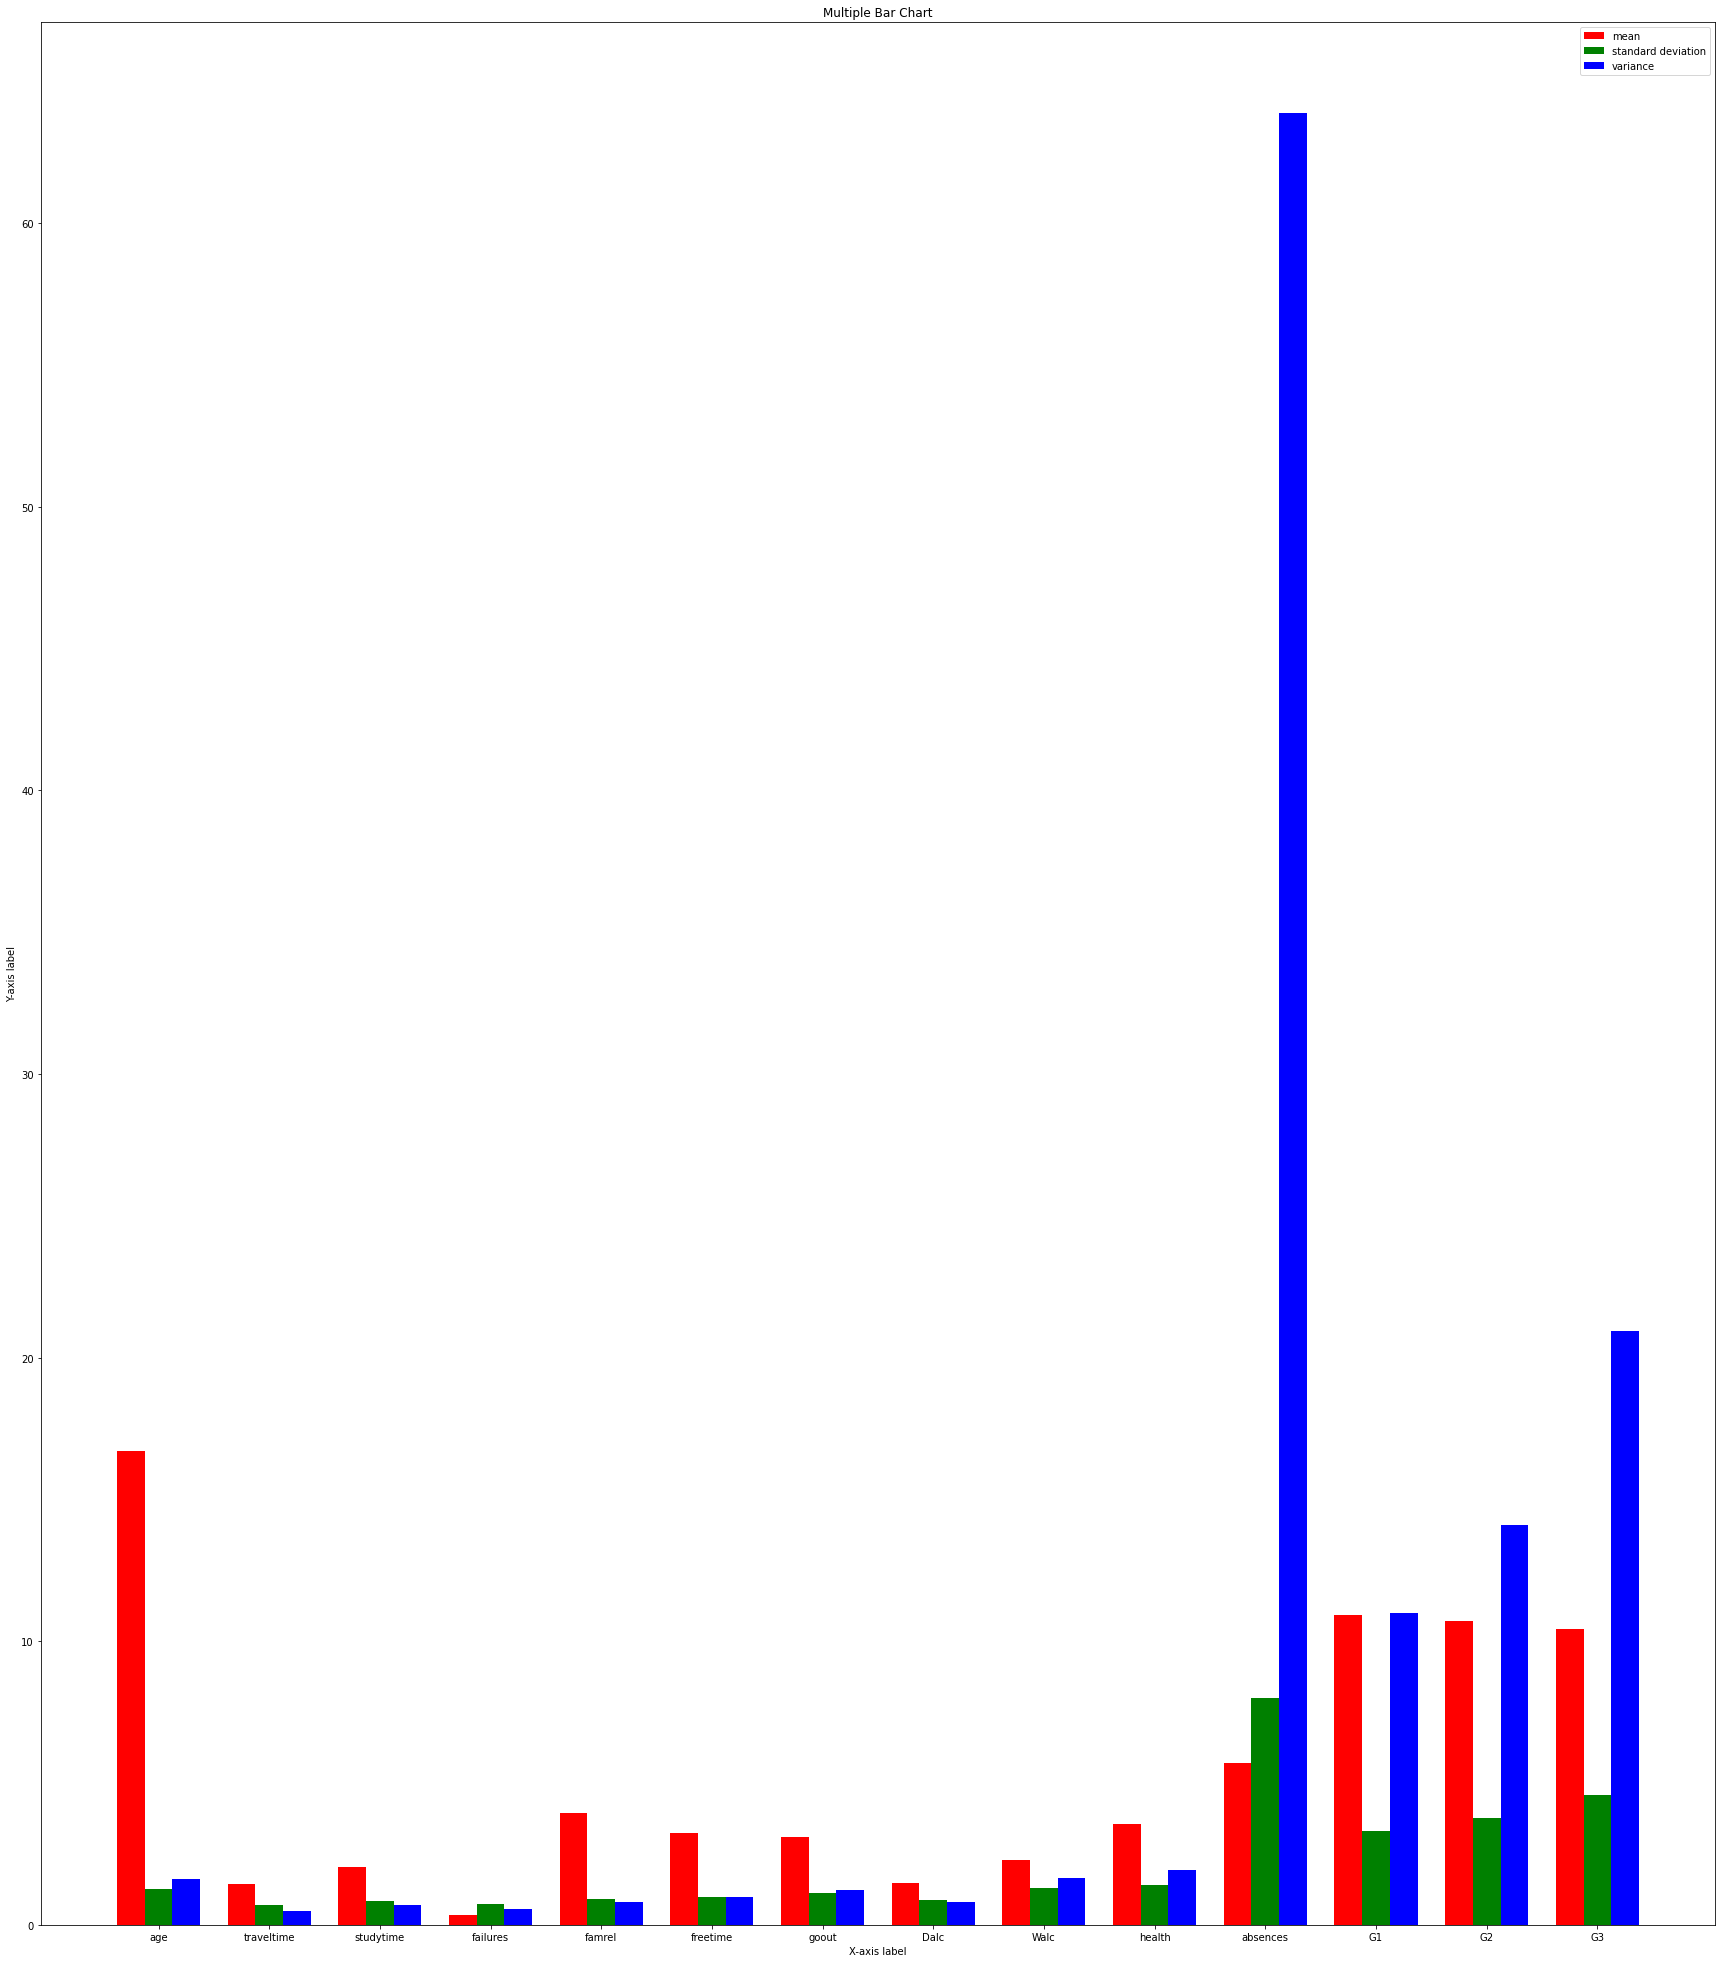

In [12]:
bar_width = 0.25
x = features

r1 = np.arange(len(mean))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

fig, ax = plt.subplots(figsize=(30, 35))

ax.bar(r1, mean, color='red', width=bar_width, label='mean')
ax.bar(r2, std_dev, color='green', width=bar_width, label='standard deviation')
ax.bar(r3, variance, color='blue', width=bar_width, label='variance')

ax.set_xticks([r + bar_width for r in range(len(mean))])
ax.set_xticklabels(x)

ax.legend()

ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')
ax.set_title('Multiple Bar Chart')

plt.show()

C:\Users\Jamaludeen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


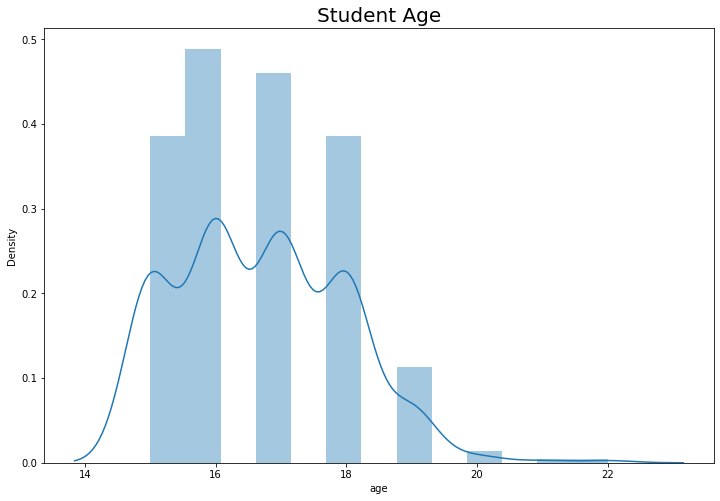

In [13]:
plt.figure(figsize=(12, 8))
sns.distplot(data["age"])
plt.title("Student Age",size=20)
plt.show()

C:\Users\Jamaludeen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


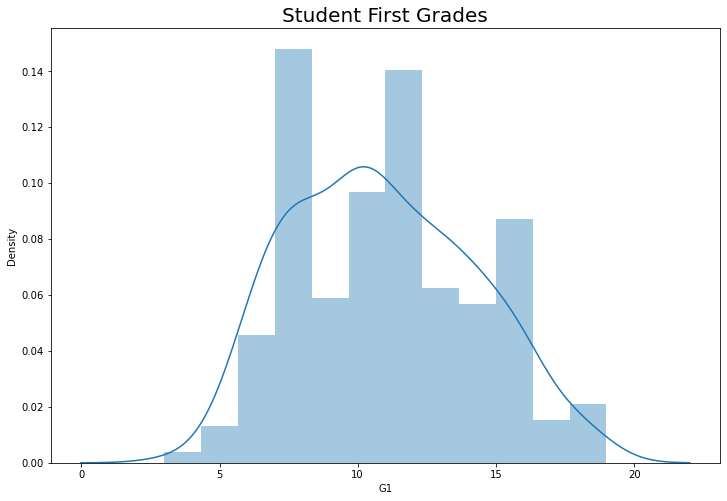

In [14]:
plt.figure(figsize=(12, 8))
sns.distplot(data["G1"])
plt.title("Student First Grades",size=20)
plt.show()

C:\Users\Jamaludeen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


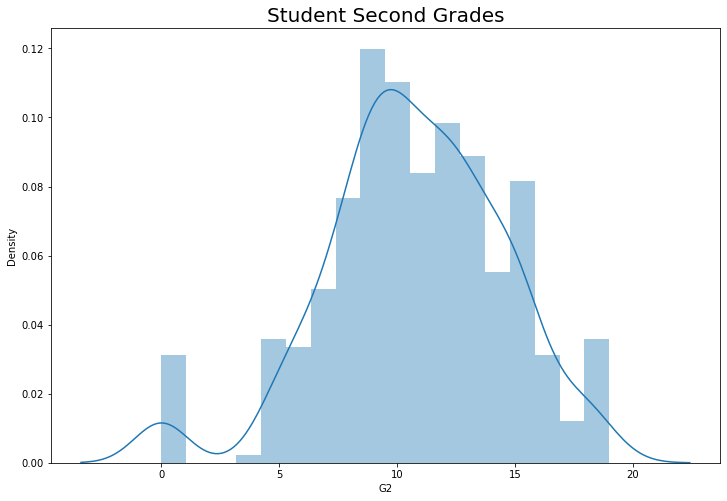

In [15]:
plt.figure(figsize=(12, 8))
sns.distplot(data["G2"])
plt.title("Student Second Grades",size=20)
plt.show()

C:\Users\Jamaludeen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


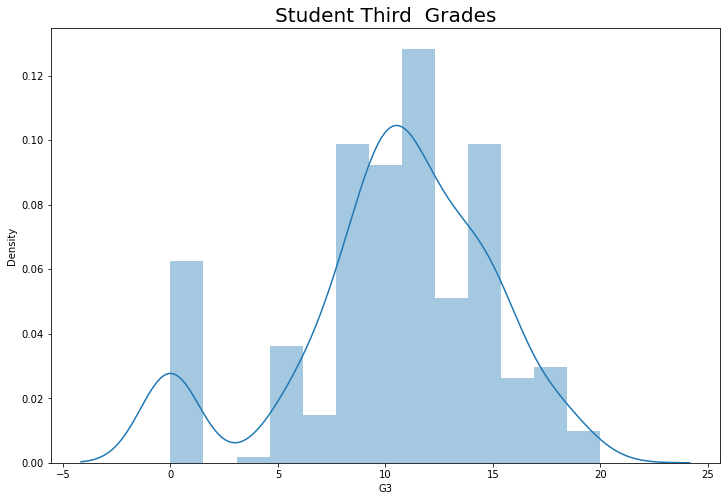

In [16]:
plt.figure(figsize=(12, 8))
sns.distplot(data["G3"])
plt.title("Student Third  Grades",size=20)
plt.show()

C:\Users\Jamaludeen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


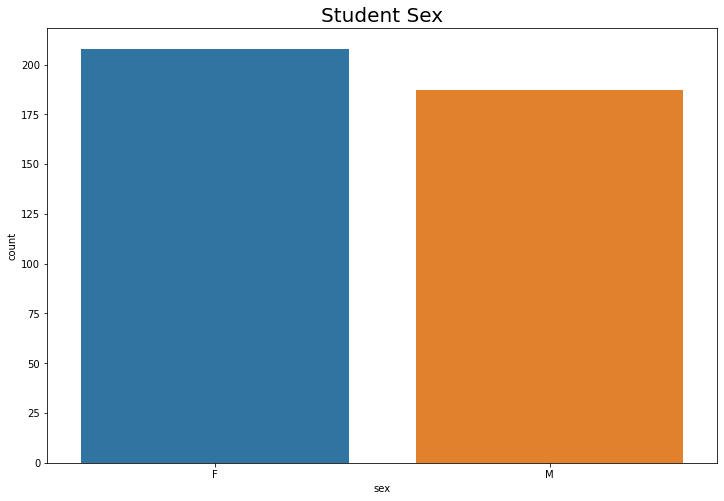

In [17]:
plt.figure(figsize=(12, 8))
sns.countplot(data["sex"])
plt.title("Student Sex",size=20)
plt.show()

C:\Users\Jamaludeen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


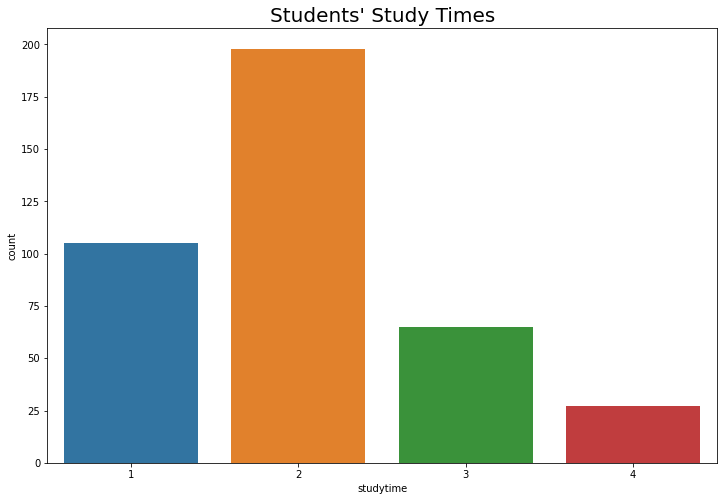

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(data["studytime"])
plt.title("Students' Study Times",size=20)
plt.show()

# CORRELATION ANALYSIS

In [19]:
corr_g1 = dict(data.corrwith(data.G1).sort_values(ascending=False))
corr_g1

{'G1': 1.0,
 'G2': 0.8521180663648064,
 'G3': 0.8014679320174148,
 'Medu': 0.20534099673858772,
 'Fedu': 0.19026993555786914,
 'studytime': 0.160611915454696,
 'famrel': 0.0221683156154966,
 'freetime': 0.012612930233135288,
 'absences': -0.031002900949028352,
 'age': -0.06408149744707414,
 'health': -0.07317207325530418,
 'traveltime': -0.0930399915823214,
 'Dalc': -0.09415879189027318,
 'Walc': -0.12617920803813473,
 'goout': -0.14910396678770735,
 'failures': -0.3547176130156354}

In [20]:
corr_g2 = dict(data.corrwith(data.G2).sort_values(ascending=False))
corr_g2

{'G2': 1.0,
 'G3': 0.9048679892693011,
 'G1': 0.8521180663648064,
 'Medu': 0.21552716763090285,
 'Fedu': 0.16489339339923362,
 'studytime': 0.13587999921449026,
 'freetime': -0.01377713859256351,
 'famrel': -0.018281347153154354,
 'absences': -0.03177670362670715,
 'Dalc': -0.06412018316253452,
 'Walc': -0.08492735257291,
 'health': -0.0977198655399096,
 'age': -0.14347404903545963,
 'traveltime': -0.1531979633172174,
 'goout': -0.16225003415973246,
 'failures': -0.355895634552574}

In [21]:
corr_g3 = dict(data.corrwith(data.G3).sort_values(ascending=False))
corr_g3

{'G3': 1.0,
 'G2': 0.9048679892693012,
 'G1': 0.8014679320174147,
 'Medu': 0.217147496138606,
 'Fedu': 0.15245693890425902,
 'studytime': 0.0978196896531963,
 'famrel': 0.051363428881282126,
 'absences': 0.03424731615006932,
 'freetime': 0.011307240308313015,
 'Walc': -0.05193932374224616,
 'Dalc': -0.05466004056673597,
 'health': -0.06133460487712135,
 'traveltime': -0.11714205281614902,
 'goout': -0.13279147350332918,
 'age': -0.16157943813834053,
 'failures': -0.3604149404616497}

In [22]:
correlation = pd.DataFrame([corr_g1.keys(),corr_g1.values(),corr_g2.keys(),corr_g2.values(),corr_g3.keys(),corr_g3.values()]).T
correlation.columns = ["columns","corr_g1","columns","corr_g2","columns","corr_g3"]
correlation

,columns,corr_g1,columns,corr_g2,columns,corr_g3
0,G1,1.0,G2,1.0,G3,1.0
1,G2,0.852118,G3,0.904868,G2,0.904868
2,G3,0.801468,G1,0.852118,G1,0.801468
3,Medu,0.205341,Medu,0.215527,Medu,0.217147
4,Fedu,0.19027,Fedu,0.164893,Fedu,0.152457
5,studytime,0.160612,studytime,0.13588,studytime,0.09782
6,famrel,0.022168,freetime,-0.013777,famrel,0.051363
7,freetime,0.012613,famrel,-0.018281,absences,0.034247
8,absences,-0.031003,absences,-0.031777,freetime,0.011307
9,age,-0.064081,Dalc,-0.06412,Walc,-0.051939


In [23]:
correlation_1 = correlation[correlation["corr_g1"] > 0 ]
correlation_2 = correlation[correlation["corr_g2"] > 0 ]
correlation_3 = correlation[correlation["corr_g3"] > 0]

In [24]:
correlation_1

,columns,corr_g1,columns,corr_g2,columns,corr_g3
0,G1,1.0,G2,1.0,G3,1.0
1,G2,0.852118,G3,0.904868,G2,0.904868
2,G3,0.801468,G1,0.852118,G1,0.801468
3,Medu,0.205341,Medu,0.215527,Medu,0.217147
4,Fedu,0.19027,Fedu,0.164893,Fedu,0.152457
5,studytime,0.160612,studytime,0.13588,studytime,0.09782
6,famrel,0.022168,freetime,-0.013777,famrel,0.051363
7,freetime,0.012613,famrel,-0.018281,absences,0.034247


In [25]:
correlation_2

,columns,corr_g1,columns,corr_g2,columns,corr_g3
0,G1,1.0,G2,1.0,G3,1.0
1,G2,0.852118,G3,0.904868,G2,0.904868
2,G3,0.801468,G1,0.852118,G1,0.801468
3,Medu,0.205341,Medu,0.215527,Medu,0.217147
4,Fedu,0.19027,Fedu,0.164893,Fedu,0.152457
5,studytime,0.160612,studytime,0.13588,studytime,0.09782


In [26]:
correlation_3

,columns,corr_g1,columns,corr_g2,columns,corr_g3
0,G1,1.0,G2,1.0,G3,1.0
1,G2,0.852118,G3,0.904868,G2,0.904868
2,G3,0.801468,G1,0.852118,G1,0.801468
3,Medu,0.205341,Medu,0.215527,Medu,0.217147
4,Fedu,0.19027,Fedu,0.164893,Fedu,0.152457
5,studytime,0.160612,studytime,0.13588,studytime,0.09782
6,famrel,0.022168,freetime,-0.013777,famrel,0.051363
7,freetime,0.012613,famrel,-0.018281,absences,0.034247
8,absences,-0.031003,absences,-0.031777,freetime,0.011307


In [27]:
priority_features_corr = ["G1","G2","G3","Medu","Fedu","studytime","freetime"]

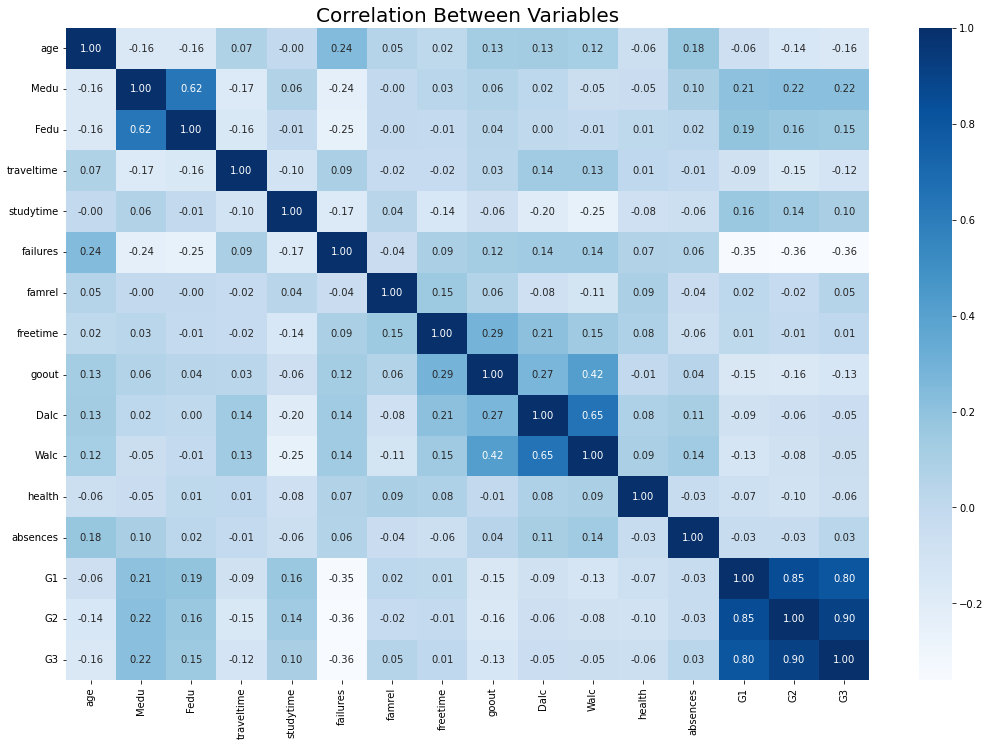

In [28]:
plt.figure(figsize=(18, 12))
sns.heatmap(data.corr(), cmap="Blues", annot=True, fmt=".2f")
plt.title("Correlation Between Variables",size=20)
plt.show()

# REF FEATURE SELECTION

In [29]:
X = data[features]
y = data["G1"]
model = LinearRegression()

rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
rfe_1 = rfe.ranking_
print("Selected Features: ", X.columns[rfe.support_])

Selected Features:  Index(['failures', 'goout', 'health', 'G1', 'G2'], dtype='object')


In [30]:
X = data[features]
y = data["G2"]
model = LinearRegression()

rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
rfe_1 = rfe.ranking_
print("Selected Features: ", X.columns[rfe.support_])

Selected Features:  Index(['freetime', 'goout', 'Dalc', 'G1', 'G2'], dtype='object')


In [31]:
X = data[features]
y = data["G3"]
model = LinearRegression()

rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
rfe_1 = rfe.ranking_
print("Selected Features: ", X.columns[rfe.support_])

Selected Features:  Index(['age', 'traveltime', 'famrel', 'G2', 'G3'], dtype='object')


# SUPERVISED LEARNING

# TRAIN TEST SPLIT

In [32]:
features = data_1.drop('G3',axis = 1)
target = data_1['G3']

X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.3, random_state = 4)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 13), (119, 13), (276,), (119,))

# LINEAR REGRESSION

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [-0.18414296  0.17986493 -0.02064169 -0.07338739  0.26865469  0.14498035
 -0.01070425 -0.25221215  0.17540391  0.06419796  0.03665982  0.16053352
  0.96502825]
Intercept: -0.7533695340404005


In [35]:
y_pred = lr.predict(X_test)
y_pred.tolist()

[10.215983881390276,
 14.872198621938582,
 11.673174720908436,
 4.609287625857827,
 11.379075657739834,
 5.456586578423433,
 8.107176360451673,
 14.751927102495618,
 4.100376897402555,
 19.32471286131988,
 9.185943988894527,
 7.121163255349305,
 12.086278529397303,
 8.433157403159901,
 2.612571012748767,
 9.098991766650045,
 6.75246164066206,
 9.815995753548394,
 11.840762219149076,
 6.1503209550195805,
 16.184244892114314,
 7.997948331355444,
 9.976305225512013,
 12.888232607502097,
 8.564052395826529,
 13.111354119377788,
 0.0724625798645242,
 8.488710803550338,
 5.759474677365721,
 8.6986679061693,
 5.3403194073907505,
 10.701541663367209,
 13.761671695234261,
 10.138690754406987,
 11.803816193832755,
 7.301654370962419,
 11.457606865169208,
 10.31414154852692,
 12.931334377471396,
 10.826459054698828,
 17.473361894824436,
 5.2616470642097894,
 7.606680703877506,
 12.080626416170224,
 13.945706768968643,
 11.626523285512102,
 9.558202038596383,
 10.19046169731079,
 16.10989157950656

In [36]:
y_test = y_test.reset_index(drop=True)
y_test

0      12
1      15
2      11
3       0
4      11
       ..
114    12
115    12
116    10
117    15
118    12
Name: G3, Length: 119, dtype: int64

In [37]:
new_frame = pd.DataFrame([y_test,y_pred]).T
new_frame.columns = ['actual_value','predicted_value']
new_frame

,actual_value,predicted_value
0,12.0,10.215984
1,15.0,14.872199
2,11.0,11.673175
3,0.0,4.609288
4,11.0,11.379076
...,...,...
114,12.0,9.366012
115,12.0,12.123932
116,10.0,9.751203
117,15.0,15.867331


In [38]:
lr_r2 = metrics.r2_score(y_test, y_pred)
print("R2 :", lr_r2)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 : 0.8540706578616488
Adjusted R^2: 0.8468298889769215
MAE: 1.1553722730956408
MSE: 3.269122292394743
RMSE: 1.8080714290079203


In [39]:
residual = new_frame["actual_value"] - new_frame["predicted_value"]
residual

0      1.784016
1      0.127801
2     -0.673175
3     -4.609288
4     -0.379076
         ...   
114    2.633988
115   -0.123932
116    0.248797
117   -0.867331
118    0.011557
Length: 119, dtype: float64

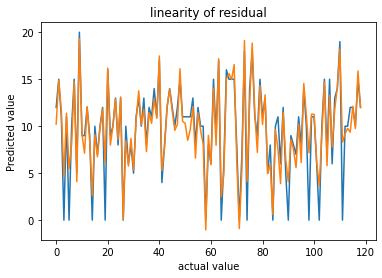

In [40]:
plt.plot(y_test)
plt.plot(y_pred)
plt.xlabel("actual value")
plt.ylabel("Predicted value")
plt.title("linearity of residual")
plt.show()

# LOGISTIC REGRESSION

In [41]:
lor = LogisticRegression()
lor.fit(X_train,y_train)


y_pred = lor.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
lor_score = lor.score(X_test,y_test)
lor_score

C:\Users\Jamaludeen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3865546218487395

# RANDOM FOREST CLASSIFIER

In [42]:
rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
rfc_score = rfc.score(X_test,y_test)
rfc_score

0.46218487394957986

# RANDOM FOREST REGRESSOR

In [43]:
rf_Regressor = RandomForestRegressor(n_estimators= 100)
rf_Regressor.fit(X_train,y_train)

y_pred = rf_Regressor.predict(X_test)

In [44]:
rfr_r2 = metrics.r2_score(y_test, y_pred)
print('R^2:',rfr_r2)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9036911598935808
Adjusted R^2: 0.8989124769875372
MAE: 0.9258823529411766
MSE: 2.157519327731092
RMSE: 1.4688496613782813


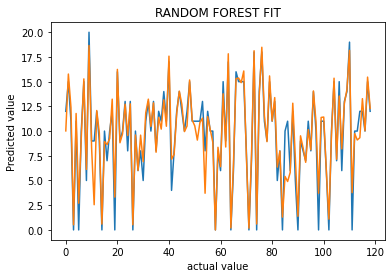

In [45]:
plt.plot(y_test)
plt.plot(y_pred)
plt.xlabel("actual value")
plt.ylabel("Predicted value")
plt.title("RANDOM FOREST FIT")
plt.show()

# DECISION TREE CLASSIFIER

In [46]:
dtc= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dtc.fit(X_train, y_train) 

y_pred= dtc.predict(X_test)

cm= confusion_matrix(y_test, y_pred)
dtc_score = dtc.score(X_test,y_test)
dtc_score

0.4369747899159664

# GRID SEARCH WITH SVM CLASSIFIER

In [47]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

svm_clf = SVC(kernel='rbf')

grid_search = GridSearchCV(svm_clf, param_grid, cv=5)

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

svc_score = accuracy_score(y_test, y_pred)
print('Accuracy score:', svc_score)

print('Best hyperparameters:', grid_search.best_params_)


C:\Users\Jamaludeen\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Accuracy score: 0.3949579831932773
Best hyperparameters: {'C': 1, 'gamma': 0.1}


# GRID SEARCH WITH SVM REGRESSOR

In [48]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svm_reg = SVR(kernel='rbf')
grid_search = GridSearchCV(svm_reg, param_grid, cv=5)

grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared value:', svr_r2)

print('Best hyperparameters:', grid_search.best_params_)


Mean squared error: 7.324249293805917
R-squared value: 0.6730550938431149
Best hyperparameters: {'C': 10, 'gamma': 0.1}


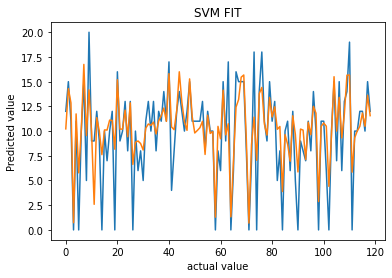

In [49]:
plt.plot(y_test)
plt.plot(y_pred)

plt.xlabel("actual value")
plt.ylabel("Predicted value")
plt.title("SVM FIT")
plt.show()




# K NEAREST NEIGHBOUR

In [50]:
# Create a KNN regression object
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn_reg.fit(X_train, y_train)

# Make predictions on test data
y_pred = knn_reg.predict(X_test)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)
knn_r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared value:', knn_r2)


Mean squared error: 3.2430252100840335
R-squared value: 0.8552355974731746


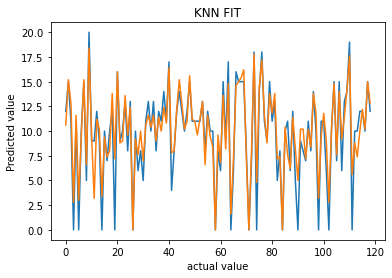

In [51]:
plt.plot(y_test)
plt.plot(y_pred)
plt.xlabel("actual value")
plt.ylabel("Predicted value")
plt.title("KNN FIT")
plt.show()

# RIDGE REGRESSION

In [52]:
# Create a Ridge regression object with a specified alpha parameter
ridge_reg = Ridge(alpha=1.0)

# Train the model on the training data
ridge_reg.fit(X_train, y_train)

# Make predictions on test data
y_pred = ridge_reg.predict(X_test)

# Compute the mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean squared error:', mse)
print('R-squared value:', ridge_r2)

Mean squared error: 3.2690274838679465
R-squared value: 0.854074889990247


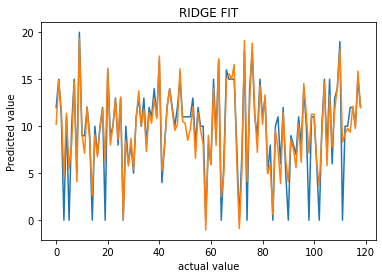

In [53]:
plt.plot(y_test)
plt.plot(y_pred)
plt.xlabel("actual value")
plt.ylabel("Predicted value")
plt.title("RIDGE FIT")
plt.show()

# LASSO REGRESSION

In [54]:
# Create a Lasso regression object with a specified alpha parameter
lasso_reg = Lasso(alpha=1.0)

# Train the model on the training data
lasso_reg.fit(X_train, y_train)

# Make predictions on test data
y_pred = lasso_reg.predict(X_test)

# Compute the mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean squared error:', mse)
print('R-squared value:', lasso_r2)


Mean squared error: 3.7186414764679334
R-squared value: 0.8340047095907702


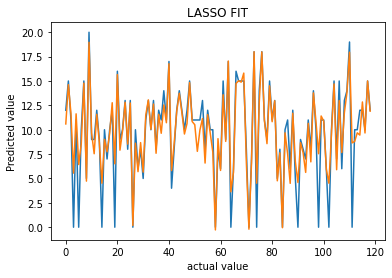

In [55]:
plt.plot(y_test)
plt.plot(y_pred)
plt.xlabel("actual value")
plt.ylabel("Predicted value")
plt.title("LASSO FIT")
plt.show()

# XGBOOST

In [56]:
# Train XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Evaluate model performance on test set
predictions = model.predict(X_test)

xb_r2 = r2_score(y_test, y_pred)
mse = np.mean((predictions - y_test)**2)

print('Mean Squared Error:', mse)
print('R-squared value:', xb_r2)

Mean Squared Error: 3.030075283910047
R-squared value: 0.8340047095907702


# UN- SUPERVISED LEARNING

# K_MEANS CLUSTERING

In [57]:
# Drop any missing values
data_1.dropna(inplace=True)

# Extract input features
X = data_1.iloc[:, :-1]

# Perform K-means clustering with k=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Get cluster labels for each data point
labels = kmeans.predict(X)

# Add cluster labels to DataFrame
data_1['Cluster'] = labels

# Print summary statistics for each cluster
for i in range(5):
    cluster = data_1[data_1['Cluster'] == i]
    print(f"Cluster {i+1}:")
    print(cluster.describe())

C:\Users\Jamaludeen\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Jamaludeen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jamaludeen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\JAMALU~1\AppData\Local\Temp/ipykernel_10492/2676123999.py:15: SettingWithCopyWarning: 
A value is trying to be set 

Cluster 1:
              age  traveltime   studytime    failures      famrel    freetime  \
count  122.000000  122.000000  122.000000  122.000000  122.000000  122.000000   
mean    16.393443    1.393443    2.098361    0.057377    3.942623    3.295082   
std      1.189189    0.610614    0.894518    0.266572    0.920826    1.026013   
min     15.000000    1.000000    1.000000    0.000000    1.000000    1.000000   
25%     15.000000    1.000000    1.000000    0.000000    4.000000    3.000000   
50%     16.000000    1.000000    2.000000    0.000000    4.000000    3.000000   
75%     17.000000    2.000000    3.000000    0.000000    5.000000    4.000000   
max     20.000000    3.000000    4.000000    2.000000    5.000000    5.000000   

            goout        Dalc       Walc      health    absences          G1  \
count  122.000000  122.000000  122.00000  122.000000  122.000000  122.000000   
mean     2.901639    1.327869    2.04918    3.540984    2.073770   14.254098   
std      0.999255  

In [58]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

C:\Users\Jamaludeen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jamaludeen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jamaludeen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jamaludeen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

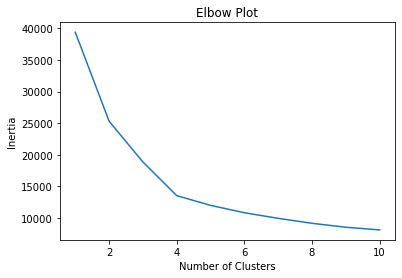

In [59]:
plt.plot(range(1, 11), inertias)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

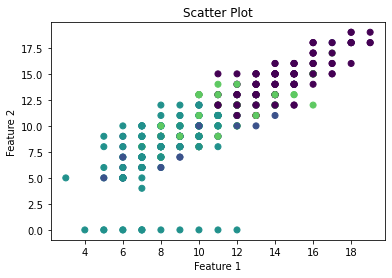

In [60]:
plt.scatter(data_1['G1'], data_1['G2'], c=data_1['Cluster'], cmap='viridis')
plt.title('Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# DBSCAN

Number of clusters: 5
Number of noise points: 250


C:\Users\Jamaludeen\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JAMALU~1\AppData\Local\Temp/ipykernel_10492/1414278184.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Cluster'] = labels


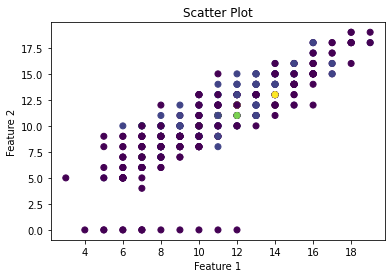

In [61]:
# Drop any missing values
data_1.dropna(inplace=True)

# Extract input features
X = data_1.iloc[:, :-1]

# Scale input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering with epsilon=0.5 and min_samples=5
dbscan = DBSCAN(eps=2, min_samples=3)
dbscan.fit(X_scaled)

# Get cluster labels for each data point
labels = dbscan.labels_

# Add cluster labels to DataFrame
data_1['Cluster'] = labels

# Print number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Plot scatter diagram of data points colored by cluster
plt.scatter(data_1['G1'], data_1['G2'], c=data_1['Cluster'], cmap='viridis')
plt.title('Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# DBSCAN WITH PCA

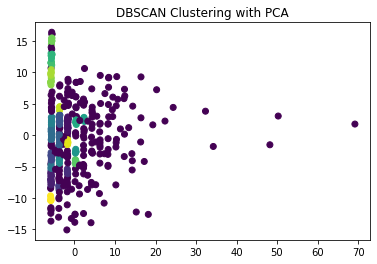

In [62]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('DBSCAN Clustering with PCA')
plt.show()


# ACCURACY COMPARISON

In [63]:
accuracy_scores = [lr_r2,rfr_r2,svr_r2,knn_r2,ridge_r2,lasso_r2,xb_r2,rfc_score,dtc_score,svc_score,lor_score]

In [64]:
accuracy_frame = pd.DataFrame([accuracy_scores])
accuracy_frame.columns = ['linear regression','random forest regression','support vector regression','knn','ridge regression','lasso regression','XGBoost','random forest classifier','decision tree classifier','support vector classifier','logistic regression']
accuracy_frame.index = ["Accuracy"]
accuracy_frame_trans = accuracy_frame.T
accuracy_frame

,linear regression,random forest regression,support vector regression,knn,ridge regression,lasso regression,XGBoost,random forest classifier,decision tree classifier,support vector classifier,logistic regression
Accuracy,0.854071,0.903691,0.673055,0.855236,0.854075,0.834005,0.834005,0.462185,0.436975,0.394958,0.386555


In [65]:
accuracy_sorted = accuracy_frame_trans.sort_values(by='Accuracy', ascending=False)
accuracy_sorted

,Accuracy
random forest regression,0.903691
knn,0.855236
ridge regression,0.854075
linear regression,0.854071
lasso regression,0.834005
XGBoost,0.834005
support vector regression,0.673055
random forest classifier,0.462185
decision tree classifier,0.436975
support vector classifier,0.394958


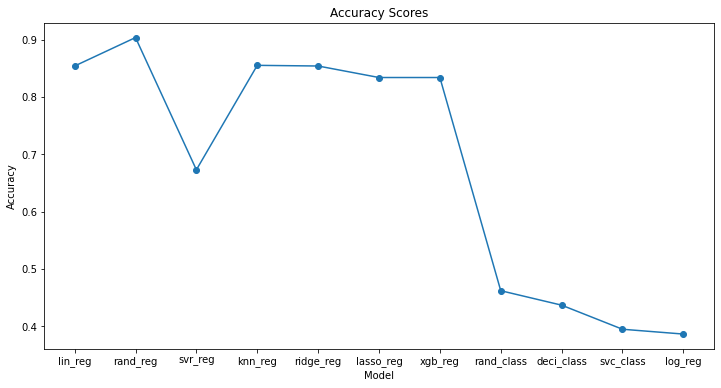

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(accuracy_scores, marker='o')
plt.title('Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(range(len(accuracy_scores)), ["lin_reg","rand_reg","svr_reg","knn_reg","ridge_reg","lasso_reg","xgb_reg","rand_class","deci_class","svc_class","log_reg"])
plt.show()